In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from sklearn.model_selection import train_test_split

HOUSING_PATH = '../ml/machine_learning/datasets/housing/'
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing=load_housing_data()
print(housing.head(5))

#Each row represents one district
#We would be predicting the median_house_value for any district
#All the fields except ocean proximity are numerical where as ocean proximity is categorical

#we can count the values of the districts based on the ocean proximity using value_count() function
housing["ocean_proximity"].value_counts()

#Plot histogram for the houing data. the histogram will be plotted only for numeric values
#there might be a spike in the last value of housing_median_age and median_house_value coz all the values beyond the last bucket value is capped that is rounded of to the last bucket value
#housing.hist(bins=50,figsize=(20,15))
#plt.show() 

#generation of Test Set

#if we fix a seed the random number is generated the same every time we execute the code
np.random.seed(42)
print(np.random.random())

#Self defined split test-train data function
def split_train_test(data,test_ratio):
    #Generates the random permutations as per data length ie if the data length is 4 then the permutation will create nos as 
    #[4,2 ,1,3]
    shuffled_indices=np.random.permutation(len(data))
    #if test data is to be 20% that length of that data is to be calculated
    test_set_size=int(len(data)*test_ratio)
    #we create test data indices by conidering the indices from 0 to test_set_size.This will create array of random 20% int
    test_indices=shuffled_indices[:test_set_size]
    #we create training set data indices by considering the indices from the test_set_size to the last value. This will create
    #array of the remaining 80% integers
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

#The below two lines is the code for the self defined split of training-testing data sets
#train_set,test_set=split_train_test(housing,0.2)
#print(len(train_set),' train, ',len(test_set),' test')

np.random.seed(42)
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set),' train, ',len(test_set),' test')

housing.describe()


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
0.3745401188473625
16512  train,  4128  test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


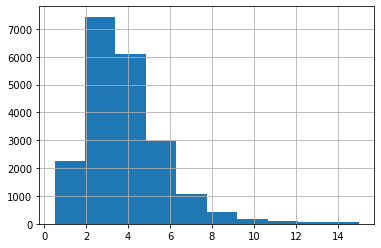

In [2]:
housing.info()
housing["median_income"].hist()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64


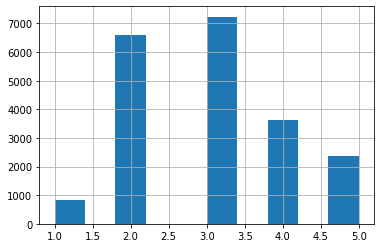

In [3]:
#We have observed that the max bin values for median income lies between 2 to 5 thousand dollars.
#Limited number of stratas are to be created and each should be large enough. So we divide the income category by 1.5 to form stratas
#Also each strata should be containing homogenous data
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
print(housing["income_cat"].value_counts())
#all the values above 5.0 are capped to 5.0. This condition means if the condition is true leave the numbers as it is else cap the 
#values
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
print(housing["income_cat"].value_counts())
#thus the stratas are created
housing["income_cat"].hist()

In [4]:
a=housing["income_cat"]

In [5]:
#a.where?

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [7]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set,test_set= train_test_split(housing,test_size=0.2,random_state=42)

compare_props=pd.DataFrame({"Overall":income_cat_proportions(housing),
                           "Stratified":income_cat_proportions(strat_test_set),
                            "Random": income_cat_proportions(test_set)
                           }).sort_index()

compare_props["Random %error"]=100*compare_props["Random"]/compare_props["Overall"]-100
compare_props["Stratified %error"]=100*compare_props["Stratified"]/compare_props["Overall"]-100



In [8]:
#It can be seen that the the Stratified %error is quite close to the original dataset and the random %error is quite huge
compare_props

,Overall,Stratified,Random,Random %error,Stratified %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [9]:
#since we created the training set and testing set using the stratified sampling tech. we can drop the income_cat field which was created for the starta creation purpose
del housing["income_cat"]
print(housing.head(5))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [10]:
#from now onwards we will be using the strat_train_set
housing=strat_train_set.copy()
print(housing)
housing.describe()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  media

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,5.000000


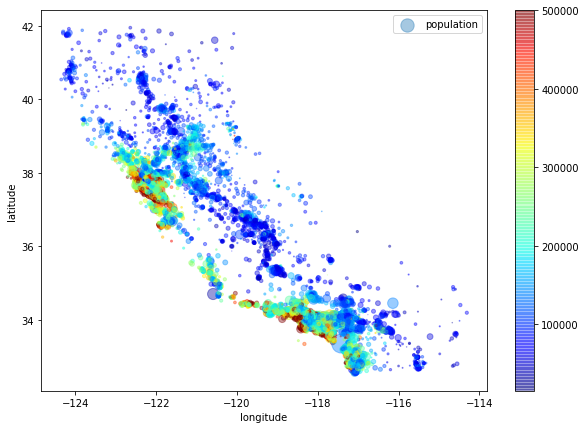

In [11]:
#the scatter plot represents the longitude and latitude..the alpha is the intensity of the color the point which are overlapping
#will be darker whereas the the data points not overlapping will be lighter
#the darker color points represents higher density  

#here the s ie the population value represents the size of each bubble/datapoint in the graph and the coloring is based
#on the median_house_value. Also the population is divided by 100 to reduce the bublle size when plotted
#Blue represents low values and red represents high values
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label='population',
            figsize=(10,7),c=housing["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,sharex=False
            )
plt.legend()



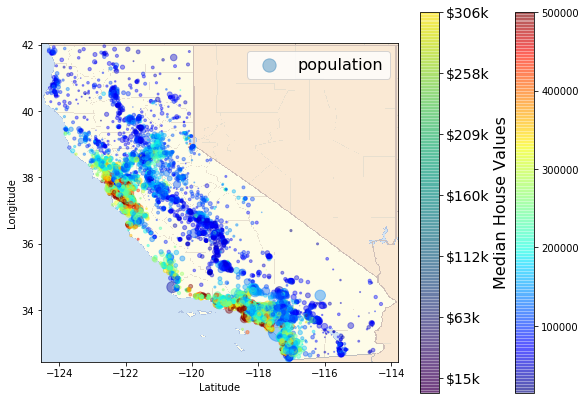

In [12]:

california_img=mpimg.imread('../ml/machine_learning/images/end_to_end_project/california.png')
ax=housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label='population',
            figsize=(10,7),c=housing["median_house_value"],cmap=plt.get_cmap("jet"),colorbar=True,sharex=False
            )
#plotting the graph with the image
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
prices = housing["median_house_value"]
#creating range of values from min prices to max prices with a difference of 11
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar=plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Values",fontsize=16)
plt.legend(fontsize=16)
plt.show()

#observations:
#1. The prices are high near the costal area and also having a higher population density
#2. The price are low in the northern California as the color of the bubbles are blue
#3. This is a high negative correlation

In [13]:
#provides details on the correlation between the different attributes. Eg: longitude:1 and latitude: -0.9 which means they have high neg correlation
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000


In [14]:
corr_matrix["median_house_value"].sort_values(ascending=False)
#We are more interested in the median house value hence we will observing the correlation of the other attributes with the median house value
#1. The highest corr value i with the median_income. Hence we can infer that the increase in the house median value is dependent with a high median income


median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f838544fc88>,
      dtype=object)

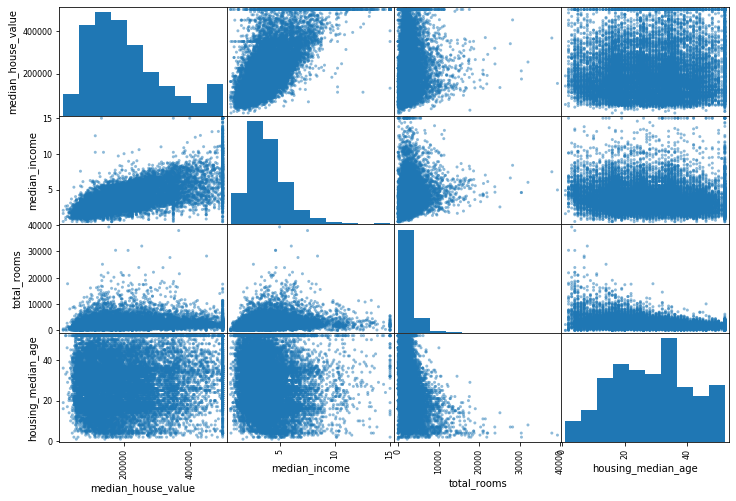

In [15]:
#we are using the scatter plot available in the pandas library. Also the 

from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
#Observations
#1. We can observe that the median_income attribute is the most promising as the correlation val is 0.6 which is towards high positive correlation
#Hence median_income is the mot promising attribute

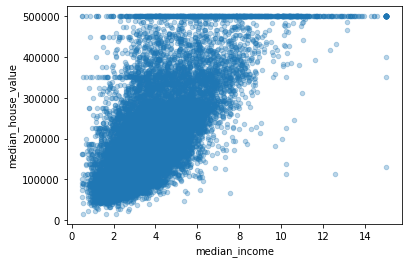

In [16]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.3)
#Observations:
#1. The correlation is towards high positive
#2. The values are capped of at 50000 median_house_value
#3. Also the values which are away from the line of correlation are interpreted as noise/outliers

In [17]:
#Feature Engineering- Combining attributes which can provide higher correlation
# Total rooms attribute does not provide any significant support to the data hence we will combining it with other attributes
#1. total rooms per household
#2. total bedrooms per room
#3. Total population per household

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

#Observations
#1. It can be observed that the newly created attribute bedrooms_per_room is the most correlated attribute after the median_income
#2. It can be seen that with increase in the bedroom_per_room the median house value decreases
#3. They have a high negative correlation

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f838438beb8>,
      dtype=object)

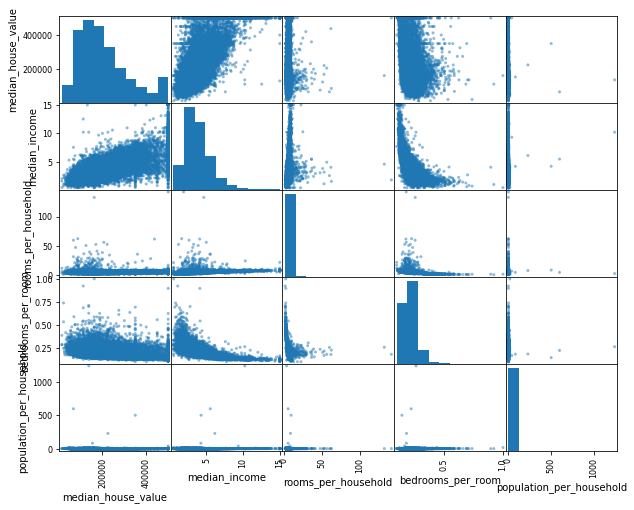

In [18]:
attributes=["median_house_value","median_income","rooms_per_household","bedrooms_per_room","population_per_household"]
scatter_matrix(housing[attributes],figsize=(10,8))

In [19]:
#Lets revert to a clean training set
#We will drop the required output label of meadian_house_value from the dataset
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy

In [20]:
housing_labels

<bound method NDFrame.copy of 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64>

In [21]:
housing.info()
#Observations:
#1. We observe that the total count for the 'total_bedrooms' attribute is not the same as that of the other fields
#2. All field value count is 16512 but that of total_bedrooms is 16354.
#3. This means that there are missing values in the 'total_bedrooms' field and ML algo cannot work with missing fields

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [22]:
#We need to remove any values which are null or missing
isn=housing.isnull()
isn.any(axis=1)

17606    False
18632    False
14650    False
3230     False
3555     False
         ...  
6563     False
12053    False
13908    False
11159    False
15775    False
Length: 16512, dtype: bool

In [23]:
#Manually filling the median value

sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head(5)
#Removing the rows where in the total_bedrooms value is null/missing
drop_rows=sample_incomplete_rows.dropna(subset=["total_bedrooms"])
#Removing the col where in there are missing/null values
drop_cols=sample_incomplete_rows.drop("total_bedrooms",axis=1)
#Filling in the missing values by median 
median_val=housing["total_bedrooms"].median()
filling_val=sample_incomplete_rows["total_bedrooms"].fillna(median_val,inplace=True)

print(sample_incomplete_rows)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4629     -118.30     34.07                18.0       3759.0           433.0   
6068     -117.86     34.01                16.0       4632.0           433.0   
17923    -121.97     37.35                30.0       1955.0           433.0   
13656    -117.30     34.05                 6.0       2155.0           433.0   
19252    -122.79     38.48                 7.0       6837.0           433.0   

       population  households  median_income ocean_proximity  income_cat  
4629       3296.0      1462.0         2.2708       <1H OCEAN         2.0  
6068       3038.0       727.0         5.1762       <1H OCEAN         4.0  
17923       999.0       386.0         4.6328       <1H OCEAN         4.0  
13656      1039.0       391.0         1.6675          INLAND         2.0  
19252      3468.0      1405.0         3.1662       <1H OCEAN         3.0  


In [24]:
#Using the imputer class to fill in the missing values
#Import thr Imputer class
from sklearn.impute import SimpleImputer
#1. Instantiate the object for class using the startegy median to fillin the missing values
imputer=SimpleImputer(strategy='median')
#Fit the data to the object created
#The data to be fit in should not contain categorical features as their median cannot be calculated. So we will remove the ocean_proximity feature from the data
housing_fit=housing.drop('ocean_proximity',axis=1)
#2. Pass the housing_fit data to the imputer object. Here the fit method performs the median calculation
imputer.fit(housing_fit)
#imputer calculates the compunded median of each col and stores it in the variable called statistics_ 
imputer.statistics_
#3. Transform function is called where the training set is transformed setting the null values to medians calculated by fit method.
#Returns numpy array
X=imputer.transform(housing_fit)
#Convert the numpy array to dataset
housing_tr=pd.DataFrame(X,columns=housing_fit.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
income_cat            16512 non-null float64
dtypes: float64(9)
memory usage: 1.1 MB


In [25]:
#Converting the categorical values to integers
#Here we have ocean_proximity as the categorical feature whose values are to be mapped to an integer
#Factorize is useful only if the feature is ordinal.Else factorize is not useful 
housing_new=housing["ocean_proximity"]

housing_cat_encoded,housing_categories = housing_new.factorize()
housing_cat_encoded
housing_cat_encoded
#Since the ocean proximity is not a ordinal catorigical value we will use One-hot encoder technique 
from sklearn.preprocessing import OneHotEncoder
#create an instance
housing_1hot_encoder=OneHotEncoder()
#Call the fit_transform sunction on the 1hotencoder instance. 
#The first argument needs to be an integer of array representing the categorical field hence we need to take the factorize of the categorical field
#Also the 1D array needs to be reshaped to 2D array
housing_1Hot_result=housing_1hot_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
#Convert the result to an array
housing_1Hot_result.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [26]:
# Categorical Encoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
        

In [27]:
#Here we are automating the process for converting the categorical val(Text val) to integer 
#This is not a built in encoder
#1.Create an instance
cat_encoder=CategoricalEncoder(encoding="onehot-dense")
#2.Convert the 1D data in housing_new to 2D array
housing_cat_reshaped=housing_new.values.reshape(-1,1)
#3.Calling the fit_transform on the categorialencoder instance created and passing the 2D array of housing_new which contains the categorical field
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
cat_encoder.categories_
#print(housing_new.head(5))

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.base import BaseEstimator,TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


In [31]:
housing_extra_attribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
longitude                   16512 non-null object
latitude                    16512 non-null object
housing_median_age          16512 non-null object
total_rooms                 16512 non-null object
total_bedrooms              16354 non-null object
population                  16512 non-null object
households                  16512 non-null object
median_income               16512 non-null object
ocean_proximity             16512 non-null object
income_cat                  16512 non-null object
rooms_per_household         16512 non-null object
population_per_household    16512 non-null object
dtypes: object(12)
memory usage: 1.5+ MB


In [32]:


housing_extra_attribs.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
count,16512.00,16512.00,16512.0,16512.0,16354.0,16512.0,16512.0,16512.0000,16512,16512.0,16512.0,16512.0
unique,825.00,839.00,52.0,5495.0,1810.0,3619.0,1691.0,10905.0000,5,5.0,15674.0,15254.0
top,-118.31,34.06,52.0,1527.0,272.0,1227.0,335.0,15.0001,<1H OCEAN,3.0,5.0,3.0
freq,133.00,207.00,1027.0,16.0,44.0,21.0,47.0,38.0000,7276,5789.0,22.0,26.0


In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,3.006541
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,1.054602
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,2.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [34]:
#sklearn only takes numpy array.Hence we create a function to convert pf.df to numpy array
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        #selecting only the attributes which are mentioned in the construct
        return X[self.attribute_names].values

#Import the pipeline from sklearn for performing imputing, combining

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Removing the ocean_proximity feature as it is categorical data and cannot be used while computing impute that is filling the missing values
housing_num = housing.drop('ocean_proximity', axis=1)

num_attribs=list(housing_num)

num_pipeline=Pipeline([('selector',DataFrameSelector(num_attribs)),
                      ('imputer',SimpleImputer(strategy='median')),
                      ('attr_adder',CombinedAttributesAdder()),
                      ('std_scaler',StandardScaler())
                      ])

#fit_transform calls the fit_transform function of each object mentioned in the Pipeline object creation.
#There is no fit_transform method for the std_scalar
#The output of one stage is given as input to another stage
housing_num_tr=num_pipeline.fit_transform(housing_num)

#Converting the categorical features to int using Pipeline object and passing the one-hot encoder object
cat_attribs=["ocean_proximity"]
cat_pipeline=Pipeline([("selector",DataFrameSelector(cat_attribs)),
                      ("cat_encoder",CategoricalEncoder(encoding="onehot-dense"))
                      ])


In [35]:
#We will now combine the num_pipeline and cat_pipeline and they will execute parallely
from sklearn.pipeline import FeatureUnion

full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
    
])



In [36]:
#Note that the housing data which contains the training set created from startas does not contain the target col which in this case is the median_house_value
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[0])
print(housing_prepared[1])
print(housing_prepared[2])

[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.95445595 -0.31205452 -0.08649871  0.15531753
  1.          0.          0.          0.          0.        ]
[-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
 -1.02222705  1.33645936  1.89030518  0.21768338 -0.03353391 -0.83628902
  1.          0.          0.          0.          0.        ]
[ 1.18684903 -1.34218285  0.18664186 -0.31365989 -0.15334458 -0.43363936
 -0.0933178  -0.5320456  -0.95445595 -0.46531516 -0.09240499  0.4222004
  0.          0.          0.          0.          1.        ]


In [37]:
housing[["longitude","latitude"]]

,longitude,latitude
17606,-121.89,37.29
18632,-121.93,37.05
14650,-117.20,32.77
3230,-119.61,36.31
3555,-118.59,34.23
...,...,...
6563,-118.13,34.20
12053,-117.56,33.88
13908,-116.40,34.09
11159,-118.01,33.82


In [38]:
print(housing_labels)

<bound method NDFrame.copy of 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64>


In [39]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

housing_labels = strat_train_set["median_house_value"].copy()
housing_labels=pd.DataFrame(housing_labels)
lin_reg = LinearRegression()
#Here weare training the model and not predicting
lin_reg.fit(housing_prepared, housing_labels)


#from sklearn.linear_model import LinearRegression

#lin_reg=LinearRegression()
#housing_labels=strat_train_set["median_house_value"].copy
#Here housing_prepared contains the o/p of FeatureUnion formed from num_pipeline and cat_pipeline
#housing_labels contains the target column value that is the median_house_value in this case
#lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#Here we are testing the data for 5 records to check the accuracy of the linear regression model
#We fetch the first 5 rows from training test createdusing strata sampling
some_data=housing.iloc[:5]
#This contains the 5 records of the output feature which is the 'median_house_value' considered as target column 
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
#The prepared data is then passed onto the predict function of the linear regression class
print('Prediction: ',lin_reg.predict(some_data_prepared))

Prediction:  [[203682.37379543]
 [326371.39370781]
 [204218.64588245]
 [ 58685.4770482 ]
 [194213.06443039]]


In [41]:
#Printing the 5 records of the target column to compare it with our predicted value from linear_regression algo
print("Actual_values: ",housing_labels.iloc[:5])

Actual_values:         median_house_value
17606            286600.0
18632            340600.0
14650            196900.0
3230              46300.0
3555             254500.0


In [42]:
#we now check the error prediction using RMSE
from sklearn.metrics import mean_squared_error 

#We pass the housing_prepared data which is obtained from full_pipeline function
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
print("Error Prediction: ",lin_rmse)

#Observations:
#1. the average range of median_house_value is between $120,000 and $265000
#2. Our error prediction is of $68376 which indicates an underfitting model 

Error Prediction:  68376.64295459937


In [43]:
#We are now using the Decision TreeRegressor algo
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
print("Error prediction using Decision Tree Regressor Algo: ",tree_rmse)

#Observations:
#1. The error prediction indicates that Decision Tree Regressor is an overfitting model


Error prediction using Decision Tree Regressor Algo:  0.0


In [44]:
#here we load the cross_val_score class and use it for evaluation of the data. 
#we use the linear reg algo as input to the cross_val_score to evaluate the training set 
from sklearn.model_selection import cross_val_score

lin_reg_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_score_rmse=np.sqrt(-lin_reg_scores)


In [45]:
#we use the decision tree regressor algo as input to the cross_val_score to evaluate the training set 
tree_reg=DecisionTreeRegressor(random_state=42)
tree_scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_scores_rmse=np.sqrt(-tree_scores)


In [46]:
def display(scores):
    print("Scores: ",scores)
    print("Mean:",scores.mean())
    print("Std Deviation:",scores.std())

In [47]:
#more the std dev more will be the spread of the data
display(lin_score_rmse)

Scores:  [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean: 68828.99948449331
Std Deviation: 2662.761570610344


In [48]:
display(tree_scores_rmse)

Scores:  [70274.7991723  67258.3624668  71350.42593227 68882.91340979
 70987.99296566 74177.52037059 70788.57311306 70850.53018019
 76430.62239321 70212.6471067 ]
Mean: 71121.4387110585
Std Deviation: 2434.3080046605132


In [49]:
#We will now implement the Random Forest Regressor which is complation of many decision tree regressors internally
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(random_state=42)
housing_labels=np.array(housing_labels).ravel()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [51]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_reg_mse=mean_squared_error(housing_labels,housing_predictions)
forest_reg_rmse=np.sqrt(forest_reg_mse)
print(forest_reg_rmse)

18626.45217719628


In [52]:
forest_reg_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=8)
forest_reg_rmse=np.sqrt(-forest_reg_scores)
display(forest_reg_rmse)

Scores:  [49560.82831228 48178.67955402 50043.24731994 51546.4531696
 52078.2109071  47338.5052215  51830.70475215 51277.46509831]
Mean: 50231.761791861856
Std Deviation: 1653.0151030257134


In [53]:
from xgboost import XGBRegressor

xgboost=XGBRegressor()
xgb_scores=cross_val_score(xgboost,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=8)
xgb_scores_rmse=np.sqrt(-xgb_scores)
display(xgb_scores_rmse)

Scores:  [52681.64014852 50260.30180317 54010.79181768 54632.76636007
 54627.67024713 50413.06655909 54287.56710672 54480.14349056]
Mean: 53174.24344161798
Std Deviation: 1740.7695116851721


In [54]:
#For Fine Tuning model we require hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#We are passing the forest_reg algo as that is the algo we have chosen which is best suiting in training the algo
#n_jobs indicates that the number processors that will be parallely used to complete the work
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs = 4)
grid_search.fit(housing_prepared, np.array(housing_labels).ravel())



GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [55]:
#To check which is the best hyperparameter combination from the chosen ones that can be used for fine tuning the model
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [56]:
#get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [57]:
# Let's look at the score of each hyperparameter combination tested during the grid search
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

64246.880700613496 {'max_features': 2, 'n_estimators': 3}
55869.85367924813 {'max_features': 2, 'n_estimators': 10}
53472.1282558969 {'max_features': 2, 'n_estimators': 30}
61376.36445082522 {'max_features': 4, 'n_estimators': 3}
53846.329115303764 {'max_features': 4, 'n_estimators': 10}
51270.1941502407 {'max_features': 4, 'n_estimators': 30}
59860.61532587693 {'max_features': 6, 'n_estimators': 3}
53114.42460001889 {'max_features': 6, 'n_estimators': 10}
50811.43543872171 {'max_features': 6, 'n_estimators': 30}
59220.31563298743 {'max_features': 8, 'n_estimators': 3}
52884.78697544277 {'max_features': 8, 'n_estimators': 10}
50944.39369116168 {'max_features': 8, 'n_estimators': 30}
62805.52917192821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54462.1410888642 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61117.32056104296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53022.992252269294 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#in grid_searchthen number of combinations that would be executed would be 200*8=1600
#But since in the randomizedsearchcv we have mentioned n_iter=10 the number of combinations that would be executed would only be 10 that too selected randomly
param_distribs={'n_estimators':randint(low=1,high=200),
               'max_features':randint(low=1,high=8)
               }

forest_reg=RandomForestRegressor(random_state=42)
random_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,cv=8,scoring="neg_mean_squared_error",n_iter=10,
                                random_state=42)
random_search.fit(housing_prepared,housing_labels)


RandomizedSearchCV(cv=8, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [60]:
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2413604895538288, 'median_income'),
 (0.16197658459849273, 'income_cat'),
 (0.10882123891274473, 'INLAND'),
 (0.10627352591969833, 'pop_per_hhold'),
 (0.06793261134305181, 'longitude'),
 (0.061828072419167844, 'latitude'),
 (0.06140451407841603, 'bedrooms_per_room'),
 (0.05359825584988401, 'rooms_per_hhold'),
 (0.04333950231438805, 'housing_median_age'),
 (0.0193269891794112, 'population'),
 (0.018329155582427953, 'total_bedrooms'),
 (0.018101702689683707, 'total_rooms'),
 (0.017836957990116878, 'households'),
 (0.01223532548334132, '<1H OCEAN'),
 (0.005008076816921073, 'NEAR OCEAN'),
 (0.0025993829445232247, 'NEAR BAY'),
 (2.761432390218492e-05, 'ISLAND')]

In [62]:
#Evaluating the model on the test case

final_model=grid_search.best_estimator_

x_test=strat_test_set.drop("median_house_value",axis=1) 
y_test=strat_test_set["median_house_value"].copy()

x_test_prepared=full_pipeline.transform(x_test)
final_predictions=final_model.predict(x_test_prepared)

final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)


In [63]:
final_rmse

49040.18609727207